 <h1 style="text-align:center;">Training ANN Model To Predict the House Price</h1></html>

</html>


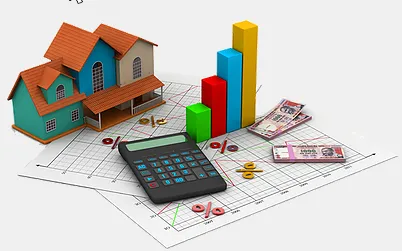

## Defining the Problem Statement:
<p>A real state agents want the help to predict the house price for regions in the USA. He gave me the dataset to work on and you decided to use Linear Regressioon Model. Create a model which will help him to estimate of what the house would sell for.
</p>


## Describe the DataSet:

<b>Avg. Area Income:</b><br> This feature represents the average income of the householder in the city where the house is located. It provides information about the economic status of the area, which can influence housing prices. Generally, areas with higher average incomes tend to have higher housing prices.<br>

<b>Avg. Area House Age:</b><br> This feature indicates the average age of houses in the same city. It gives insights into the housing stock's age, which can affect property values. Newer houses might be more desirable and therefore command higher prices, while older houses might have depreciated in value.<br>

<b>Avg. Area Number of Rooms:</b><br> This feature represents the average number of rooms in houses within the same city. It provides information about the size and layout of properties. Houses with more rooms generally tend to be larger and may be more expensive.<br>

<b>Avg. Area Number of Bedrooms:</b><br> Similar to the previous feature, this represents the average number of bedrooms in houses within the same city. It gives an indication of the typical size and accommodation of properties in the area. Larger families or those seeking more space might prefer houses with more bedrooms.<br>

<b>Area Population:</b><br> This feature indicates the population of the city where the house is located. Population size can influence various factors such as demand for housing, availability of amenities, and overall quality of life. Cities with larger populations might experience higher housing demand and prices.<br>

<b>Price:</b><br> This is the target variable or the variable we want to predict. It represents the price at which the house was sold. This is what we aim to predict based on the other features in the dataset.<br>

<b>Address:</b><br> This feature provides the address of the houses. It is typically not used directly in predictive modeling but can be useful for data exploration and visualization.<br>


    

# **Loading the Libries**

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [40]:
data=pd.read_csv("USA_Housing (1).csv")
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### **collecting Basic Info About the Dataset**

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [45]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [47]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [53]:
data.select_dtypes("object")

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [57]:
data.shape

(5000, 7)

#### **Now simmple Drop this columns 'address`**

In [59]:
data.drop(columns="Address",index=1,inplace=True)

In [62]:
data.shape

(4999, 6)

### finding Duplicated row 

In [71]:
data[data.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price


Great there is No duplicated rows in the Data

#### now finding null values in DataSet

In [77]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

# finding the outliers in Dataset

<Axes: >

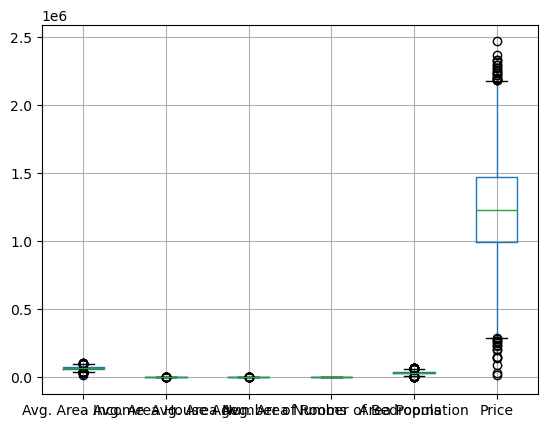

In [80]:
data.boxplot()

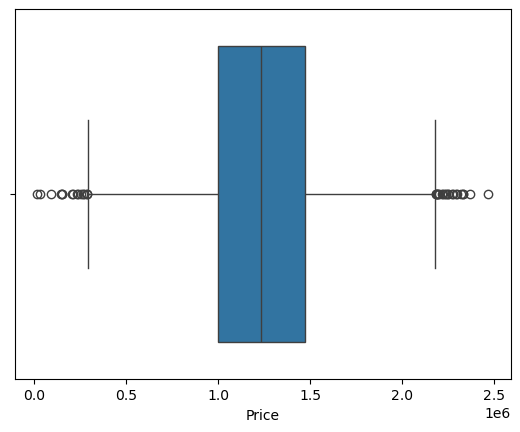

In [88]:
sns.boxplot(x=data["Price"])
plt.show()

In [92]:
clean_data=pd.read_csv("clean DataSet.csv")
clean_data.drop(columns="Unnamed: 0",inplace=True)

In [96]:
data=clean_data

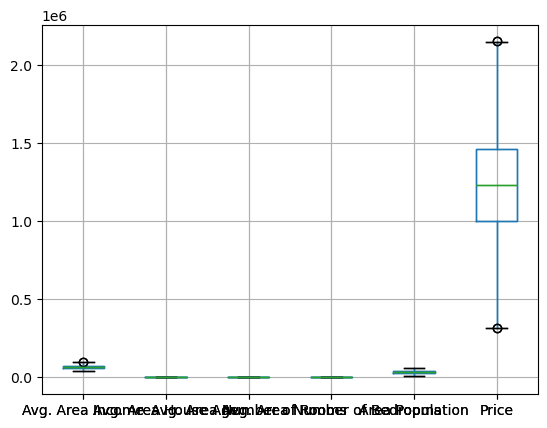

In [100]:
data.boxplot()
plt.show()

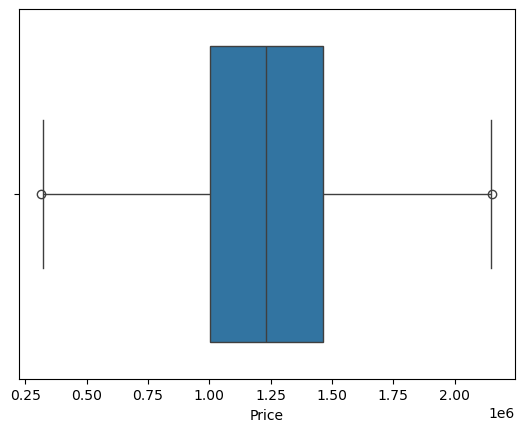

In [102]:
sns.boxplot(x=data["Price"])
plt.show()

### Now our Dataset are almost clean 

### **Now Defining input and Target Features**

In [106]:
X=data.drop(columns="Price")
Y=data["Price"]

In [112]:
X.shape

(4839, 5)

In [116]:
Y.shape

(4839,)

##### **Now Applay the Train Test Spliting on The DataSet**

In [119]:
from  sklearn.model_selection import train_test_split

In [362]:
# Step 3: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=41, test_size=0.20)

In [364]:


# Step 4: Print the shapes
print("Shape of x_train  :", x_train.shape)
print("Shape of x_test   :", x_test.shape)
print("Shape of y_train  :", y_train.shape)
print("Shape of y_test   :", y_test.shape)

Shape of x_train  : (3871, 5)
Shape of x_test   : (968, 5)
Shape of y_train  : (3871,)
Shape of y_test   : (968,)


## Now Sclaed the Input Data

In [366]:
from sklearn.preprocessing import StandardScaler
# Apply standard scaling
scaler = StandardScaler()


In [368]:
# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [370]:
# Convert the scaled data back to DataFrame for better readability (optional)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)



In [372]:
x_train_scaled_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-1.132240,0.526508,-0.214019,-0.669562,2.283885
1,-0.547162,-0.624902,-0.808296,0.355309,-0.176033
2,-0.782206,1.687930,1.451635,-0.613073,-2.053068
3,0.729261,-0.217291,-0.567299,-1.420059,1.493349
4,-0.289021,1.219414,-2.404154,-1.258662,0.448739
...,...,...,...,...,...
3866,0.863147,-0.463117,-2.344973,-1.581456,-0.020909
3867,0.066367,1.612072,-0.084903,0.282680,-0.426183
3868,-1.122187,-1.524677,0.204961,-0.782540,0.085396
3869,-1.243353,0.906608,-0.667856,0.169703,1.352487


In [374]:
x_test_scaled_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-0.357709,0.912401,1.073326,0.306890,-0.697946
1,-1.210965,-1.455973,-0.323784,0.040585,0.943843
2,-1.723169,-0.487440,1.567259,-0.588864,0.495983
3,-1.963186,1.246399,0.942689,1.646486,1.530739
4,0.856761,-0.189663,-0.430998,0.064794,-0.285619
...,...,...,...,...,...
963,1.043471,0.109702,0.501353,-0.588864,-1.926076
964,0.870833,0.859972,-0.160565,-1.371640,-0.447987
965,2.037342,-1.659668,1.922433,0.871780,-2.128755
966,-0.120852,0.851557,0.835441,1.702975,1.945543


In [376]:
round(x_test_scaled_df.std(),1)

Avg. Area Income                0.9
Avg. Area House Age             1.0
Avg. Area Number of Rooms       1.0
Avg. Area Number of Bedrooms    1.0
Area Population                 1.0
dtype: float64

In [156]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4.839000e+03
mean,68627.168083,5.979163,6.986517,3.985652,36114.000721,1.232299e+06
std,10208.490191,0.963700,0.982588,1.235004,9626.100767,3.354917e+05
min,40581.778087,3.386004,4.290194,2.000000,9487.921585,3.141678e+05
25%,61629.547567,5.334288,6.305693,3.150000,29451.878677,1.003923e+06
50%,68854.090852,5.975373,7.002686,4.050000,36145.209834,1.232466e+06
75%,75682.930672,6.642647,7.661516,4.490000,42763.519903,1.463413e+06
max,96778.121065,8.598383,9.666899,6.500000,62449.973848,2.152959e+06


# **Now Show final Data that we fit to The Model**

In [378]:


# Step 4: Print the shapes
print("Traning Data")
print("---------------------------")
print("Shape of x_train  :", x_train_scaled_df.shape)
print("Shape of y_train  :", y_train.shape)


print("\n\nTesting Data")
print("---------------------------")
print("Shape of x_test   :", x_test_scaled_df.shape)
print("Shape of y_test   :", y_test.shape)

Traning Data
---------------------------
Shape of x_train  : (3871, 5)
Shape of y_train  : (3871,)


Testing Data
---------------------------
Shape of x_test   : (968, 5)
Shape of y_test   : (968,)


## **Defining The Hyperparameter for the ANN** 

In [178]:
batch_size=200
epoch=20
hidden_layer1=500
hidden_layer2=400
hidden_layer3=20

ouput_layer=1

input_size=5


# **Buliding The FCN networks**

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## **Now Training a Model**

In [209]:
from  time import time

In [221]:
# Define RMSE loss function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Define and compile the model
def get_model2():
    model = Sequential()
    model.add(Dense(hidden_layer1, activation="relu", input_dim=input_size))
    model.add(Dense(hidden_layer2, activation="relu"))
    model.add(Dense(hidden_layer3, activation="relu"))
    model.add(Dense(output_layer, activation="linear"))
    
    # Compile the model with RMSE loss function
    model.compile(optimizer=Adam(), loss=rmse, metrics=[rmse])
    
    return model

In [223]:
Model1=get_model()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,441 (825.94 KB)

 Trainable params: 211,441 (825.94 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
# Start timing
start_time = time()

# Fit the model
History1=Model1.fit(x_train_scaled_df, y_train, epochs=40, validation_split=0.20, verbose=1)

# End timing
end_time = time()


# Print total training time
print(f"Total Training Time: {round(end_time - start_time, 1)} seconds")

Epoch 1/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1631479922688.0000 - mse: 1631479922688.0000 - val_loss: 1631487524864.0000 - val_mse: 1631487524864.0000
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1614690648064.0000 - mse: 1614690648064.0000 - val_loss: 1513303965696.0000 - val_mse: 1513303965696.0000
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1411703635968.0000 - mse: 1411703635968.0000 - val_loss: 1005117505536.0000 - val_mse: 1005117505536.0000
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 798874861568.0000 - mse: 798874861568.0000 - val_loss: 271651946496.0000 - val_mse: 271651946496.0000
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 185799720960.0000 - mse: 185799720960.0000 - val_loss: 65624838144.0000 - val_mse: 65624838144.0000
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 59544621056.0000 - mse: 59544621056.0000 - val_loss: 44649586688.0000 - val_mse: 44649586688.0000
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━

In [237]:
History1.history

{'loss': [1625640402944.0,
  1582385070080.0,
  1296220160000.0,
  619779391488.0,
  131263774720.0,
  53692002304.0,
  42323189760.0,
  36872040448.0,
  32904802304.0,
  29667713024.0,
  26821666816.0,
  24352159744.0,
  22213980160.0,
  20380422144.0,
  18745550848.0,
  17405376512.0,
  16235969536.0,
  15242570752.0,
  14421142528.0,
  13751540736.0,
  13156932608.0,
  12687024128.0,
  12292514816.0,
  12007553024.0,
  11736053760.0,
  11503935488.0,
  11319747584.0,
  11212695552.0,
  11062325248.0,
  10941110272.0,
  10884766720.0,
  10785456128.0,
  10719966208.0,
  10684438528.0,
  10625436672.0,
  10582784000.0,
  10557810688.0,
  10495198208.0,
  10532760576.0,
  10465354752.0],
 'mse': [1625640402944.0,
  1582385070080.0,
  1296220160000.0,
  619779391488.0,
  131263774720.0,
  53692002304.0,
  42323189760.0,
  36872040448.0,
  32904802304.0,
  29667713024.0,
  26821666816.0,
  24352159744.0,
  22213980160.0,
  20380422144.0,
  18745550848.0,
  17405376512.0,
  16235969536.0,

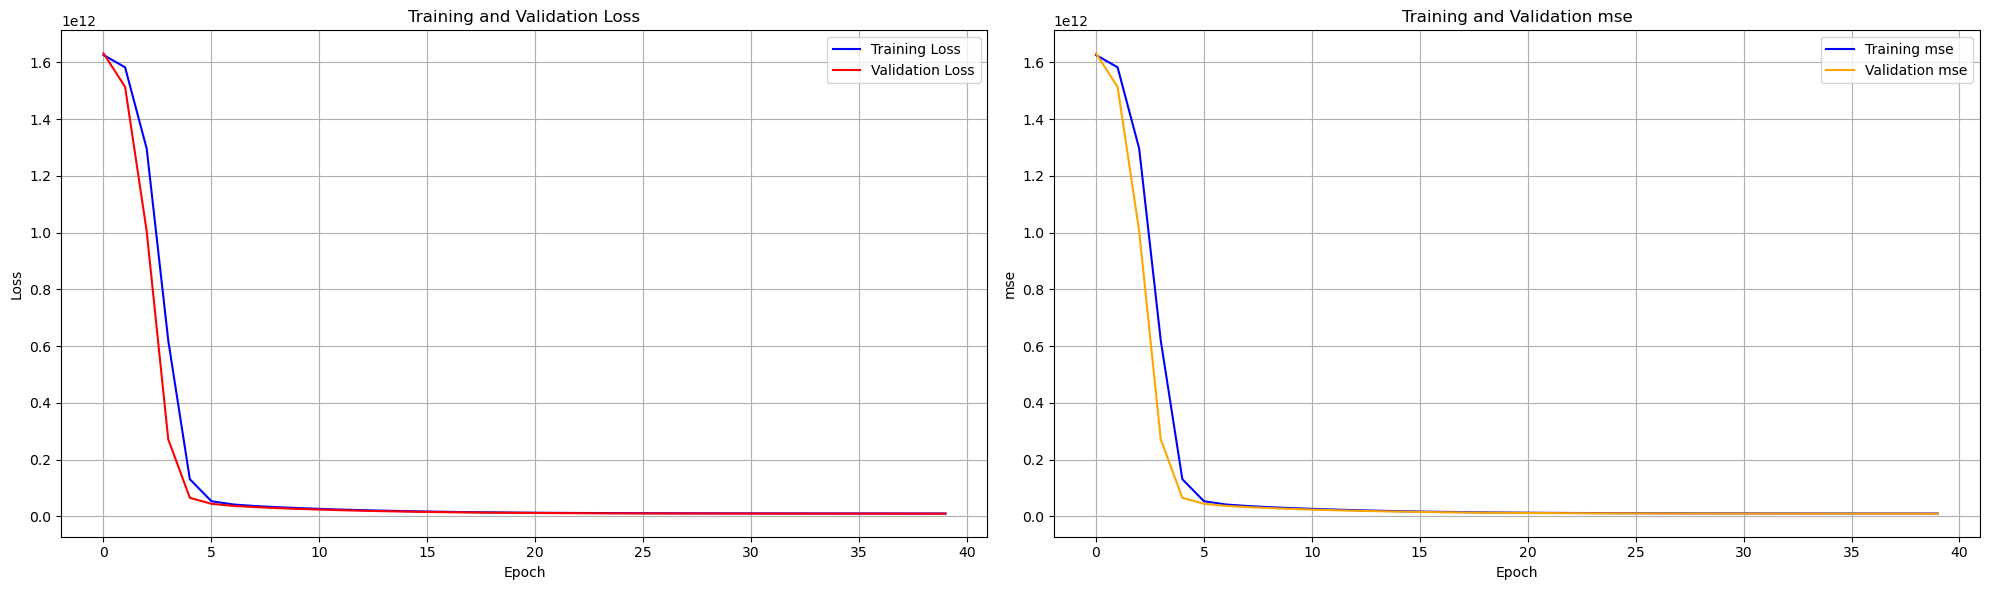

In [252]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mse = history.history['mse']
    val_mse = history.history['val_mse']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(mse, label='Training mse', color='blue')
    ax2.plot(val_mse, label='Validation mse', color='orange')
    ax2.set_title('Training and Validation mse')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('mse')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
plot_training_history(History1)

### **Model predication**

In [285]:
prdiction=Model1.predict(x_test_scaled_df)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [287]:
prdiction

array([[1314368.  ],
       [ 808767.94],
       [1011328.06],
       [1327624.  ],
       [1285888.5 ],
       [ 792093.8 ],
       [1247369.9 ],
       [1878114.6 ],
       [1753351.4 ],
       [1130669.  ],
       [1228020.  ],
       [ 997042.1 ],
       [1336050.1 ],
       [1729531.2 ],
       [ 822925.25],
       [1422697.4 ],
       [1331371.2 ],
       [1931486.4 ],
       [1595463.9 ],
       [1112380.2 ],
       [1197289.1 ],
       [1659023.1 ],
       [1306798.8 ],
       [1177122.2 ],
       [1372032.4 ],
       [1650164.9 ],
       [1491783.9 ],
       [ 947533.2 ],
       [1722941.8 ],
       [ 967059.7 ],
       [1621470.1 ],
       [1658935.1 ],
       [1243627.5 ],
       [1418775.9 ],
       [1137502.9 ],
       [1192925.2 ],
       [1139973.5 ],
       [1147549.5 ],
       [1124276.2 ],
       [1473975.9 ],
       [1335854.5 ],
       [ 916106.7 ],
       [1441294.1 ],
       [ 983282.7 ],
       [1327962.9 ],
       [ 737354.44],
       [1259652.5 ],
       [13353

In [293]:
prdiction.shape

(968, 1)

In [301]:
# Function to plot model results
def plot_results(model_name, y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Values')
    plt.plot(predictions, label='Predicted Values', alpha=0.7)
    plt.title(f'{model_name} Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [320]:
prdiction=pd.DataFrame(prdiction)
prdiction.rename(columns={0:"Predicted Values"},inplace=True)
prdiction

,Predicted Values
0,1.314368e+06
1,8.087679e+05
2,1.011328e+06
3,1.327624e+06
4,1.285888e+06
...,...
963,1.259865e+06
964,1.472268e+06
965,1.394285e+06
966,1.709537e+06


# Model Prdication

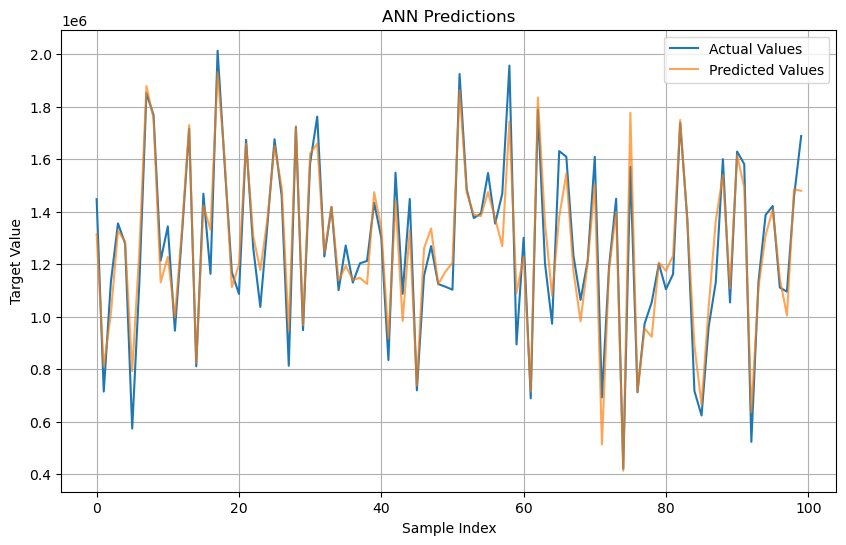

In [316]:
plot_results("ANN",y_test.head(100),p.head(100))

# Model Evluation 

In [382]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
mse = mean_squared_error(y_test, prdiction)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 10842297980.855352
Root Mean Squared Error (RMSE): 104126.35584161847


In [380]:
y_test.shape, prdiction.shape

((968,), (968, 1))